In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import json
%matplotlib inline

In [2]:
# read the data
df_math = pd.read_csv('data/student-mat.csv')
df_por = pd.read_csv('data/student-por.csv')

In [3]:
df_math.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [4]:
df_por.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,0,11,13,13


In [5]:
df_math.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      395 non-null    object
 1   sex         395 non-null    object
 2   age         395 non-null    int64 
 3   address     395 non-null    object
 4   famsize     395 non-null    object
 5   Pstatus     395 non-null    object
 6   Medu        395 non-null    int64 
 7   Fedu        395 non-null    int64 
 8   Mjob        395 non-null    object
 9   Fjob        395 non-null    object
 10  reason      395 non-null    object
 11  guardian    395 non-null    object
 12  traveltime  395 non-null    int64 
 13  studytime   395 non-null    int64 
 14  failures    395 non-null    int64 
 15  schoolsup   395 non-null    object
 16  famsup      395 non-null    object
 17  paid        395 non-null    object
 18  activities  395 non-null    object
 19  nursery     395 non-null    object
 20  higher    

In [6]:
df_por.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 649 entries, 0 to 648
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      649 non-null    object
 1   sex         649 non-null    object
 2   age         649 non-null    int64 
 3   address     649 non-null    object
 4   famsize     649 non-null    object
 5   Pstatus     649 non-null    object
 6   Medu        649 non-null    int64 
 7   Fedu        649 non-null    int64 
 8   Mjob        649 non-null    object
 9   Fjob        649 non-null    object
 10  reason      649 non-null    object
 11  guardian    649 non-null    object
 12  traveltime  649 non-null    int64 
 13  studytime   649 non-null    int64 
 14  failures    649 non-null    int64 
 15  schoolsup   649 non-null    object
 16  famsup      649 non-null    object
 17  paid        649 non-null    object
 18  activities  649 non-null    object
 19  nursery     649 non-null    object
 20  higher    

In [7]:
df_math.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000
mean,16.696203,2.749367,2.521519,1.448101,2.035443,0.334177,3.944304,3.235443,3.108861,1.481013,2.291139,3.554430,5.708861,10.908861,10.713924,10.415190
std,1.276043,1.094735,1.088201,0.697505,0.839240,0.743651,0.896659,0.998862,1.113278,0.890741,1.287897,1.390303,8.003096,3.319195,3.761505,4.581443
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,3.000000,0.000000,0.000000
25%,16.000000,2.000000,2.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,8.000000,9.000000,8.000000
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,4.000000,11.000000,11.000000,11.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,8.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,75.000000,19.000000,19.000000,20.000000


In [17]:
#merge the two data sets
df = pd.merge(df_math, df_por, how='inner',
                   left_on=["school","sex","age","address","famsize","Pstatus","Medu","Fedu","Mjob","Fjob","reason","nursery","internet"], 
                   right_on=["school","sex","age","address","famsize","Pstatus","Medu","Fedu","Mjob","Fjob","reason","nursery","internet"],
                   suffixes=('_math', '_por')
                  )



In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 382 entries, 0 to 381
Data columns (total 53 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   school           382 non-null    object
 1   sex              382 non-null    object
 2   age              382 non-null    int64 
 3   address          382 non-null    object
 4   famsize          382 non-null    object
 5   Pstatus          382 non-null    object
 6   Medu             382 non-null    int64 
 7   Fedu             382 non-null    int64 
 8   Mjob             382 non-null    object
 9   Fjob             382 non-null    object
 10  reason           382 non-null    object
 11  guardian_math    382 non-null    object
 12  traveltime_math  382 non-null    int64 
 13  studytime_math   382 non-null    int64 
 14  failures_math    382 non-null    int64 
 15  schoolsup_math   382 non-null    object
 16  famsup_math      382 non-null    object
 17  paid_math        382 non-null    ob

<Figure size 1080x360 with 0 Axes>

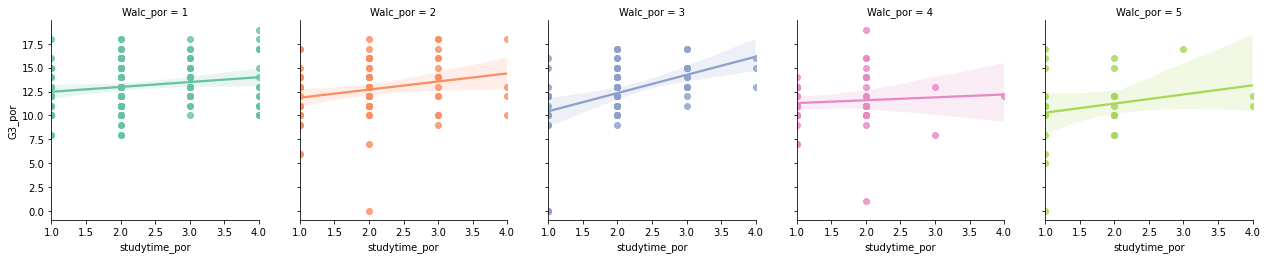

In [28]:
plt.figure(figsize=(15,5))
ax = sns.lmplot(x="studytime_por", y="G3_por",
                    height=3.5,
                    col="Walc_por",
                    col_wrap=5,
                    hue="Walc_por", 
                    palette="Set2",
                    data=df)
ax.fig.subplots_adjust(wspace=.2)

<Figure size 1080x360 with 0 Axes>

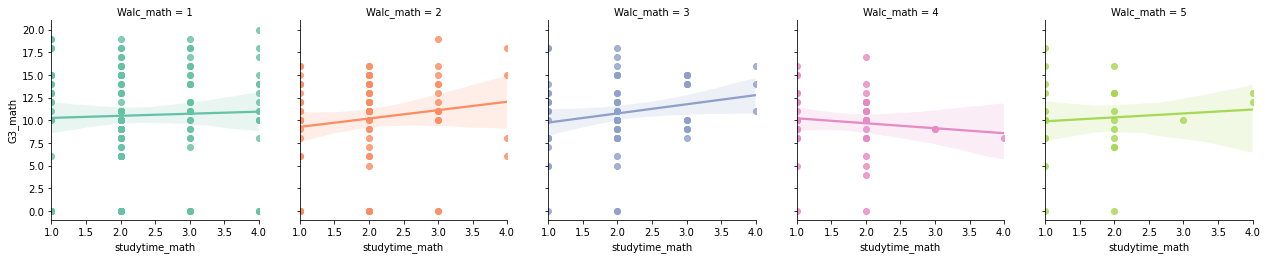

In [29]:
plt.figure(figsize=(15,5))
ax = sns.lmplot(x="studytime_math", y="G3_math",
                    height=3.5,
                    col="Walc_math",
                    col_wrap=5,
                    hue="Walc_math", 
                    palette="Set2",
                    data=df)
ax.fig.subplots_adjust(wspace=.2)

<Figure size 1080x360 with 0 Axes>

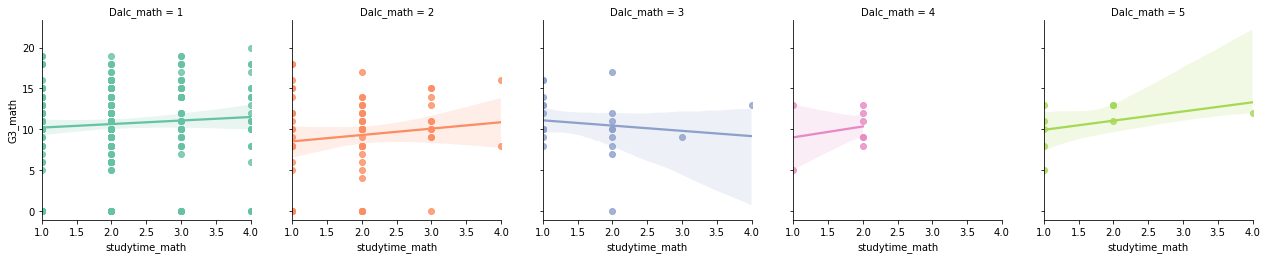

In [31]:
plt.figure(figsize=(15,5))
ax = sns.lmplot(x="studytime_math", y="G3_math",
                    height=3.5,
                    col="Dalc_math",
                    col_wrap=5,
                    hue="Dalc_math", 
                    palette="Set2",
                    data=df)
ax.fig.subplots_adjust(wspace=.2)

<Figure size 1080x360 with 0 Axes>

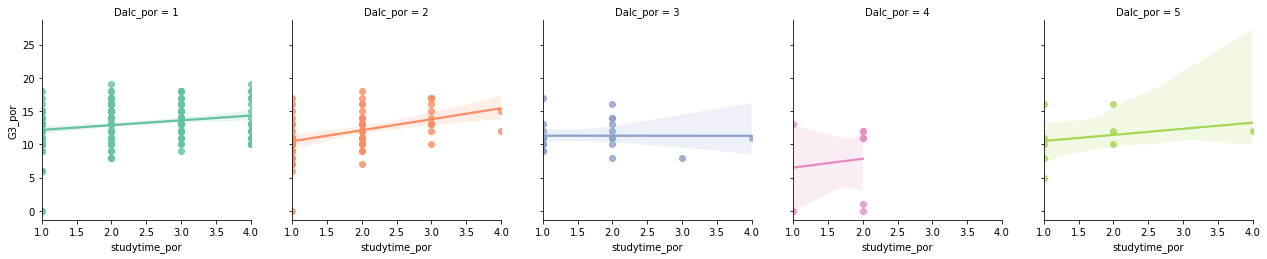

In [30]:
plt.figure(figsize=(15,5))
ax = sns.lmplot(x="studytime_por", y="G3_por",
                    height=3.5,
                    col="Dalc_por",
                    col_wrap=5,
                    hue="Dalc_por", 
                    palette="Set2",
                    data=df)
ax.fig.subplots_adjust(wspace=.2)